In [1]:
import accure_analytics.utils.absolutify_paths

from matplotlib import font_manager
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import numpy as np
import seaborn as sns
import accure_plot
from accure_plot import select_plotting_theme

from accure_analytics.utils.meta_data import unpack_meta
import math
import os
from accure_io.s3 import upload_object
from zipfile import ZipFile

Identified project root as = /Users/kenny/git/analytics
Old current working directory (cwd) = /Users/kenny/git/analytics/customer/nidec/POC
New current working directory (cwd) = /Users/kenny/git/analytics
New current working directory also added to 'sys.path'.


In [2]:
LOCAL_PATH = '/Users/kenny/Library/CloudStorage/OneDrive-ACCUREBatteryIntelligenceGmbH/Freigegebene Dokumente/05_Sales_Pipeline/ABO Wind/04_Data/NIDEC_POC/00_data_exchange'
SAVE_PATH = '/Users/kenny/accure_local'
S3_PATH = "s3://accure-project-data/nidec/product=transform"
files = sorted(os.listdir(LOCAL_PATH))
print(len(files))
files

369


['.DS_Store',
 '20200701.zip',
 '20200702.zip',
 '20200703.zip',
 '20200704.zip',
 '20200705.zip',
 '20200706.zip',
 '20200707.zip',
 '20200708.zip',
 '20200709.zip',
 '20200710.zip',
 '20200711.zip',
 '20200712.zip',
 '20200713.zip',
 '20200714.zip',
 '20200715.zip',
 '20200716.zip',
 '20200717.zip',
 '20200718.zip',
 '20200719.zip',
 '20200720.zip',
 '20200721.zip',
 '20200722.zip',
 '20200723.zip',
 '20200724.zip',
 '20200725.zip',
 '20200726.zip',
 '20200727.zip',
 '20200728.zip',
 '20200729.zip',
 '20200730.zip',
 '20200731.zip',
 '20200801.zip',
 '20200802.zip',
 '20200803.zip',
 '20200804.zip',
 '20200805.zip',
 '20200806.zip',
 '20200807.zip',
 '20200808.zip',
 '20200809.zip',
 '20200810.zip',
 '20200811.zip',
 '20200812.zip',
 '20200813.zip',
 '20200814.zip',
 '20200815.zip',
 '20200816.zip',
 '20200817.zip',
 '20200818.zip',
 '20200819.zip',
 '20200820.zip',
 '20200821.zip',
 '20200822.zip',
 '20200823.zip',
 '20200824.zip',
 '20200825.zip',
 '20200826.zip',
 '20200827.zip',


## Rename columns
z = container #  
b = bank #  
y = rack #  

In [30]:
rename = {}
for z in range(1,5):
    for x in range(1,3):
        for j in range(1,13):
            y = str(j).zfill(2)
            rename[f'N{z}BBMS{x}GR0{y}.YQ01'] = f'state_of_charge'
            rename[f'N{z}BBMS{x}GR0{y}.YQ02'] = f'state_of_health'
            rename[f'N{z}BBMS{x}GR0{y}.YQ03'] = f'current'
            rename[f'N{z}BBMS{x}GR0{y}.YQ04'] = f'temperature_avg'
            rename[f'N{z}BBMS{x}GR0{y}.YQ05'] = f'temperature_max'
            rename[f'N{z}BBMS{x}GR0{y}.YV05'] = f'temperature_id_max'
            rename[f'N{z}BBMS{x}GR0{y}.YQ06'] = f'temperature_min'
            rename[f'N{z}BBMS{x}GR0{y}.YV06'] = f'temperature_id_min'
            rename[f'N{z}BBMS{x}GR0{y}.YQ07'] = f'voltage_rack'
            rename[f'N{z}BBMS{x}GR0{y}.YQ08'] = f'voltage_cell_avg'
            rename[f'N{z}BBMS{x}GR0{y}.YQ09'] = f'voltage_cell_max'
            rename[f'N{z}BBMS{x}GR0{y}.YV09'] = f'voltage_cell_id_max'
            rename[f'N{z}BBMS{x}GR0{y}.YQ10'] = f'voltage_cell_min'
            rename[f'N{z}BBMS{x}GR0{y}.YV10'] = f'voltage_cell_id_min'
            # rename[f'N{z}BBMS{x}GR0{y}.YQ01'] = f'state_of_charge_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YQ02'] = f'state_of_health_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YQ03'] = f'current_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YQ04'] = f'temperature_avg_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YQ05'] = f'temperature_max_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YV05'] = f'temperature_id_max_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YQ06'] = f'temperature_min_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YV06'] = f'temperature_id_min_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YQ07'] = f'voltage_rack_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YQ08'] = f'voltage_cell_avg_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YQ09'] = f'voltage_cell_max_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YV09'] = f'voltage_cell_id_max_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YQ10'] = f'voltage_cell_min_c{z}_b{x}_r{y}'
            # rename[f'N{z}BBMS{x}GR0{y}.YV10'] = f'voltage_cell_id_min_c{z}_b{x}_r{y}'
print(len(rename))
rename

1344


{'N1BBMS1GR001.YQ01': 'state_of_charge',
 'N1BBMS1GR001.YQ02': 'state_of_health',
 'N1BBMS1GR001.YQ03': 'current',
 'N1BBMS1GR001.YQ04': 'temperature_avg',
 'N1BBMS1GR001.YQ05': 'temperature_max',
 'N1BBMS1GR001.YV05': 'temperature_id_max',
 'N1BBMS1GR001.YQ06': 'temperature_min',
 'N1BBMS1GR001.YV06': 'temperature_id_min',
 'N1BBMS1GR001.YQ07': 'voltage_rack',
 'N1BBMS1GR001.YQ08': 'voltage_cell_avg',
 'N1BBMS1GR001.YQ09': 'voltage_cell_max',
 'N1BBMS1GR001.YV09': 'voltage_cell_id_max',
 'N1BBMS1GR001.YQ10': 'voltage_cell_min',
 'N1BBMS1GR001.YV10': 'voltage_cell_id_min',
 'N1BBMS1GR002.YQ01': 'state_of_charge',
 'N1BBMS1GR002.YQ02': 'state_of_health',
 'N1BBMS1GR002.YQ03': 'current',
 'N1BBMS1GR002.YQ04': 'temperature_avg',
 'N1BBMS1GR002.YQ05': 'temperature_max',
 'N1BBMS1GR002.YV05': 'temperature_id_max',
 'N1BBMS1GR002.YQ06': 'temperature_min',
 'N1BBMS1GR002.YV06': 'temperature_id_min',
 'N1BBMS1GR002.YQ07': 'voltage_rack',
 'N1BBMS1GR002.YQ08': 'voltage_cell_avg',
 'N1BBMS1GR002

## Read zip files and check for differences

In [4]:
# sample dataframe
c=4
b=2
r=12
path = f'{LOCAL_PATH}/20210105.zip'
print(path)
zip = ZipFile(path)
df5m = pd.read_csv(zip.open(f'N{c}BBMS{b}_2021_01_05_5m.csv'),index_col='DateTime')
df1s = pd.read_csv(zip.open(f'N{c}BBMS{b}_2021_01_05_1s.csv'),index_col='DateTime')
df5m.index = pd.to_datetime(df5m.index)
df1s.index = pd.to_datetime(df1s.index)
pd.set_option('display.max_columns', None)
display(df1s[[col for col in df1s.columns if 'GR012' in col]])
display(df5m[[col for col in df5m.columns if 'GR012' in col]])

/Users/kenny/Library/CloudStorage/OneDrive-ACCUREBatteryIntelligenceGmbH/Freigegebene Dokumente/05_Sales_Pipeline/ABO Wind/04_Data/NIDEC_POC/00_data_exchange/20210105.zip


""
DateTime
2021-01-05 00:00:00
2021-01-05 00:00:01
2021-01-05 00:00:02
2021-01-05 00:00:03
2021-01-05 00:00:04
...
2021-01-05 23:59:56
2021-01-05 23:59:57
2021-01-05 23:59:58


""
DateTime
2021-01-05 00:00:00
2021-01-05 00:05:00
2021-01-05 00:10:00
2021-01-05 00:15:00
2021-01-05 00:20:00
...
2021-01-05 23:40:00
2021-01-05 23:45:00
2021-01-05 23:50:00


In [7]:
c = 4
b = 2
r = 11
df = pd.read_parquet(f'{S3_PATH}/c{c}b{b}r{str(r).zfill(2)}.parquet')

,current,voltage_rack,voltage_cell_avg,voltage_cell_id_min,voltage_cell_min,voltage_cell_id_max,voltage_cell_max,state_of_charge,temperature_max,temperature_id_max,temperature_min,temperature_id_min,temperature_avg,state_of_health,id
DateTime,,,,,,,,,,,,,,,
2020-07-01 00:00:00,-0.0,826.4,3.472,185.0,3.443,113.0,3.476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c4b2r11
2020-07-01 00:00:01,-0.0,826.4,3.472,185.0,3.443,148.0,3.477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c4b2r11
2020-07-01 00:00:02,-0.0,826.4,3.472,185.0,3.443,113.0,3.477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c4b2r11
2020-07-01 00:00:03,-0.0,826.4,3.472,185.0,3.443,143.0,3.477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c4b2r11
2020-07-01 00:00:04,-0.0,826.3,3.472,185.0,3.441,113.0,3.476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,c4b2r11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01 23:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,25.0,34.0,22.5,1.0,24.0,97.0,c4b2r11
2021-07-01 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,25.0,34.0,22.5,1.0,24.0,97.0,c4b2r11
2021-07-01 23:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.5,25.0,34.0,22.5,1.0,24.0,97.0,c4b2r11


In [25]:
date1 = '2021-01-02'
date2 = '2021-01-03'

id = f'N{c}BBMS{b}GR0{str(r).zfill(2)}'
# print(True in df[(df.index >= '2020-10-01')&(df.index < '2020-10-02')]['temperature_id_min'].dropna().eq(df5m[f'{id}.YV06'][0:-1]))
# print(True in df[(df.index >= '2020-10-01')&(df.index < '2020-10-02')]['state_of_health'].dropna().eq(csv[f'{id}.YQ02'][0:-1]))
# display(df[(df.index >= '2020-10-01')&(df.index < '2020-10-02')]['state_of_charge'].dropna())
# display(csv[f'{id}.YQ02'][0:-1])
if True in (df[(df.index >= date1)&(df.index < date2)]['state_of_charge'].dropna() - df5m[f'{id}.YQ01'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['state_of_health'].dropna() - df5m[f'{id}.YQ02'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['temperature_avg'].dropna() - df5m[f'{id}.YQ04'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['temperature_min'].dropna() - df5m[f'{id}.YQ06'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['temperature_id_min'].dropna() - df5m[f'{id}.YV06'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['temperature_id_max'].dropna() - df5m[f'{id}.YV05'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['temperature_max'].dropna() - df5m[f'{id}.YQ06'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['voltage_rack'].dropna() - df1s[f'{id}.YQ07'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['current'].dropna() - df1s[f'{id}.YQ03'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['voltage_cell_avg'].dropna() - df1s[f'{id}.YQ08'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['voltage_cell_min'].dropna() - df1s[f'{id}.YQ10'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['voltage_cell_id_min'].dropna() - df1s[f'{id}.YV10'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['voltage_cell_id_max'].dropna() - df1s[f'{id}.YV09'] > 0)\
or True in (df[(df.index >= date1)&(df.index < date2)]['voltage_cell_max'].dropna() - df1s[f'{id}.YQ09'] > 0):
    print('DIFF!')
else:
    print('NO DIFF')

NO DIFF


In [93]:
df[(df.index >= '2020-08-01')&(df.index < '2020-08-30')]['temperature_id_min'].unique()

array([nan,  3.,  2.,  1.,  4.,  0., 24., 16., 20.,  5., 10.])

In [89]:
df[['voltage_cell_avg','voltage_cell_min','voltage_cell_max','voltage_cell_id_min','voltage_cell_id_max']].dropna()

,voltage_cell_avg,voltage_cell_min,voltage_cell_max,voltage_cell_id_min,voltage_cell_id_max
DateTime,,,,,
2020-07-01 00:00:00,3.466,3.449,3.473,57.0,17.0
2020-07-01 00:00:01,3.466,3.449,3.473,57.0,17.0
2020-07-01 00:00:02,3.466,3.449,3.473,57.0,17.0
2020-07-01 00:00:03,3.466,3.449,3.473,57.0,17.0
2020-07-01 00:00:04,3.466,3.449,3.473,57.0,17.0
...,...,...,...,...,...
2021-07-01 23:59:56,3.473,3.439,3.481,63.0,30.0
2021-07-01 23:59:57,3.473,3.439,3.481,63.0,30.0
2021-07-01 23:59:58,3.473,3.439,3.481,63.0,30.0


## Preprocess Data

In [10]:
# separate by cont/bank/rack
for file in files[238:]:
    if (file.endswith('.zip')):
        zip = ZipFile(f'{LOCAL_PATH}/{file}')
        list = zip.namelist()
        for i in range(0,len(list),2):
            f1 = list[i]    # 1s resolution
            if f1.endswith('.csv'):
                f2 = list[i+1]  # 5m resolution
                df1 = pd.read_csv(zip.open(f1),index_col='DateTime')
                df2 = pd.read_csv(zip.open(f2),index_col='DateTime')
                df = pd.concat([df1,df2],copy=False) ## specify axis
                cont = f1[1]
                bank = f1[6]
                df.rename(columns=rename,inplace=True)
                df.index = pd.to_datetime(df.index)
                path = f'{SAVE_PATH}/CONT{cont}BANK{bank}'
                if not os.path.exists(path):
                    os.makedirs(path)
                for j in range(1,13):
                    n = str(j).zfill(2)
                    df3 = df[[col for col in df if f'r{n}' in col]]
                    if not os.path.exists(f'{path}/RACK{j}'):
                        os.makedirs(f'{path}/RACK{j}')
                    df3.to_parquet(f'{path}/RACK{j}/{file[0:8]}.parquet')
                stat = pd.DataFrame()
                stat['soc'] = df[[col for col in df if col.startswith('state_of_charge')]].mean(axis=1)
                stat['soh'] = df[[col for col in df if col.startswith('state_of_health')]].mean(axis=1)
                stat['volt'] = df[[col for col in df if col.startswith('voltage_rack')]].mean(axis=1)
                stat['curr'] = df[[col for col in df if col.startswith('current')]].mean(axis=1)
                stat['temp'] = df[[col for col in df if col.startswith('temperature_avg')]].mean(axis=1)
                stat.to_parquet(path=f'{SAVE_PATH}/stats/{file[0:8]}_stats.parquet')
                # df.to_parquet(path=f'{path}/{file[0:8]}.parquet')
                print(f'Sucessfully saved CONT{cont}BANK{bank}',file)

Sucessfully saved CONT1BANK1 20210222.zip
Sucessfully saved CONT1BANK2 20210222.zip
Sucessfully saved CONT2BANK1 20210222.zip
Sucessfully saved CONT2BANK2 20210222.zip
Sucessfully saved CONT3BANK1 20210222.zip
Sucessfully saved CONT3BANK2 20210222.zip
Sucessfully saved CONT4BANK1 20210222.zip
Sucessfully saved CONT4BANK2 20210222.zip
Sucessfully saved CONT1BANK1 20210223.zip
Sucessfully saved CONT1BANK2 20210223.zip
Sucessfully saved CONT2BANK1 20210223.zip
Sucessfully saved CONT2BANK2 20210223.zip
Sucessfully saved CONT3BANK1 20210223.zip
Sucessfully saved CONT3BANK2 20210223.zip
Sucessfully saved CONT4BANK1 20210223.zip
Sucessfully saved CONT4BANK2 20210223.zip
Sucessfully saved CONT1BANK1 20210224.zip
Sucessfully saved CONT1BANK2 20210224.zip
Sucessfully saved CONT2BANK1 20210224.zip
Sucessfully saved CONT2BANK2 20210224.zip
Sucessfully saved CONT3BANK1 20210224.zip
Sucessfully saved CONT3BANK2 20210224.zip
Sucessfully saved CONT4BANK1 20210224.zip
Sucessfully saved CONT4BANK2 20210

In [8]:
rename = {}
for z in range(1,5):
    for x in range(1,3):
        for j in range(1,13):
            y = str(j).zfill(2)
            rename[f'state_of_charge_c{z}_b{x}_r{y}'] = f'state_of_charge'
            rename[f'state_of_health_c{z}_b{x}_r{y}'] = f'state_of_health'
            rename[f'current_c{z}_b{x}_r{y}'] = f'current'
            rename[f'temperature_avg_c{z}_b{x}_r{y}'] = f'temperature_avg'
            rename[f'temperature_max_c{z}_b{x}_r{y}'] = f'temperature_max'
            rename[f'temperature_id_max_c{z}_b{x}_r{y}'] = f'temperature_id_max'
            rename[f'temperature_min_c{z}_b{x}_r{y}'] = f'temperature_min'
            rename[f'temperature_id_min_c{z}_b{x}_r{y}'] = f'temperature_id_min'
            rename[f'voltage_rack_c{z}_b{x}_r{y}'] = f'voltage_rack'
            rename[f'voltage_cell_avg_c{z}_b{x}_r{y}'] = f'voltage_cell_avg'
            rename[f'voltage_cell_max_c{z}_b{x}_r{y}'] = f'voltage_cell_max'
            rename[f'voltage_cell_id_max_c{z}_b{x}_r{y}'] = f'voltage_cell_id_max'
            rename[f'voltage_cell_min_c{z}_b{x}_r{y}'] = f'voltage_cell_min'
            rename[f'voltage_cell_id_min_c{z}_b{x}_r{y}'] = f'voltage_cell_id_min'
rename

{'state_of_charge_c1_b1_r01': 'state_of_charge',
 'state_of_health_c1_b1_r01': 'state_of_health',
 'current_c1_b1_r01': 'current',
 'temperature_avg_c1_b1_r01': 'temperature_avg',
 'temperature_max_c1_b1_r01': 'temperature_max',
 'temperature_id_max_c1_b1_r01': 'temperature_id_max',
 'temperature_min_c1_b1_r01': 'temperature_min',
 'temperature_id_min_c1_b1_r01': 'temperature_id_min',
 'voltage_rack_c1_b1_r01': 'voltage_rack',
 'voltage_cell_avg_c1_b1_r01': 'voltage_cell_avg',
 'voltage_cell_max_c1_b1_r01': 'voltage_cell_max',
 'voltage_cell_id_max_c1_b1_r01': 'voltage_cell_id_max',
 'voltage_cell_min_c1_b1_r01': 'voltage_cell_min',
 'voltage_cell_id_min_c1_b1_r01': 'voltage_cell_id_min',
 'state_of_charge_c1_b1_r02': 'state_of_charge',
 'state_of_health_c1_b1_r02': 'state_of_health',
 'current_c1_b1_r02': 'current',
 'temperature_avg_c1_b1_r02': 'temperature_avg',
 'temperature_max_c1_b1_r02': 'temperature_max',
 'temperature_id_max_c1_b1_r02': 'temperature_id_max',
 'temperature_min_

In [ ]:
save = '/Users/kenny/Library/CloudStorage/OneDrive-ACCUREBatteryIntelligenceGmbH/Freigegebene Dokumente/05_Sales_Pipeline/ABO Wind/04_Data/NIDEC_POC/01_preprocessed_data'
for c in range(4,5):
    for b in range(2,3):
        for r in range(12,13):
            id = f'c{c}b{b}r{str(r).zfill(2)}'
            # df = pd.read_parquet(f'{SAVE_PATH}/CONT{c}BANK{b}/RACK{r}')
            df = pd.read_parquet(f'/Users/kenny/accure_local/CONT4BANK2/RACK12/20200701.parquet')
            display(df)
            df.rename(columns=rename,inplace=True)
            df['id'] = id
            display(df)
            # df.to_parquet(f'{save}/{id}.parquet')
            # upload_object(remote_path=f"{S3_PATH}/{id}.parquet",data=df.to_parquet())
            print('Done with ',id)

## Statistics

In [3]:
path = '/Users/kenny/Library/CloudStorage/OneDrive-ACCUREBatteryIntelligenceGmbH/Freigegebene Dokumente/05_Sales_Pipeline/ABO Wind/04_Data/NIDEC_POC/02_figures'
stats = pd.read_parquet(f'{SAVE_PATH}/stats/overview.parquet')
# stats = pd.read_parquet('s3://accure-project-data/nidec/product=statistics/stats.parquet')
stats

,volt,curr,soc,soh,temp,status
DateTime,,,,,,
2020-07-01 00:00:00,831.127273,0.0,11.454545,98.318182,23.545455,idle
2020-07-01 00:00:01,831.118182,0.0,NaN,NaN,NaN,idle
2020-07-01 00:00:02,831.136364,0.0,NaN,NaN,NaN,idle
2020-07-01 00:00:03,831.118182,0.0,NaN,NaN,NaN,idle
2020-07-01 00:00:04,831.127273,0.0,NaN,NaN,NaN,idle
...,...,...,...,...,...,...
2021-07-01 23:59:56,825.990909,0.0,NaN,NaN,NaN,idle
2021-07-01 23:59:57,825.990909,0.0,NaN,NaN,NaN,idle
2021-07-01 23:59:58,825.990909,0.0,NaN,NaN,NaN,idle


In [ ]:
stats = pd.read_parquet(f'{SAVE_PATH}/stats')
df1 = stats[['volt','curr']].dropna()
df2 = stats[['soc','soh','temp']].dropna()
stats = pd.merge(left=df1,right=df2,left_index=True,right_index=True,how='outer')
# charge status
stats.loc[(stats['curr']>=-1)&(stats['curr']<=1),'status'] = 'idle'
stats.loc[stats['curr']<-1,'status'] = 'charge'
stats.loc[stats['curr']>1,'status'] = 'discharge'
stats.to_parquet(f'{SAVE_PATH}/stats/overview.parquet')
upload_object(remote_path="s3://accure-project-data/nidec/product=statistics/stats.parquet",data=stats.to_parquet())
# stats = pd.read_parquet('s3://accure-project-data/nidec/product=statistics/stats.parquet')

### SOC

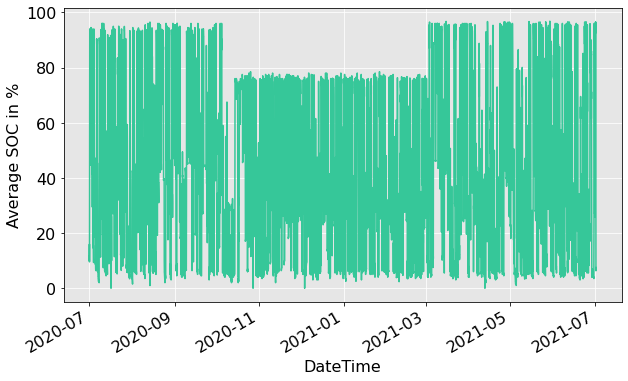

In [12]:
stats['soc'].dropna().plot(ylabel='Average SOC in %')
plt.savefig(f'{path}/soc_line.svg')

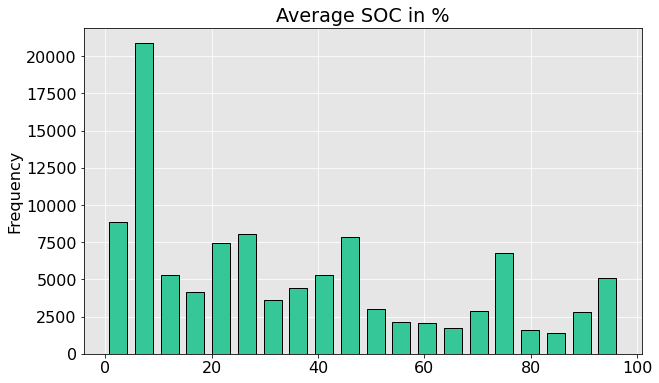

In [21]:
stats['soc'].dropna().plot(kind='hist',bins=20,edgecolor='black',title='Average SOC in %',rwidth=0.7)
plt.savefig(f'{path}/soc_hist.svg')

### Voltage

In [ ]:
stats[stats['volt']>0]['volt'].dropna().plot(ylabel='Average Rack Voltage in V')
plt.savefig(f'{path}/volt_line.svg')

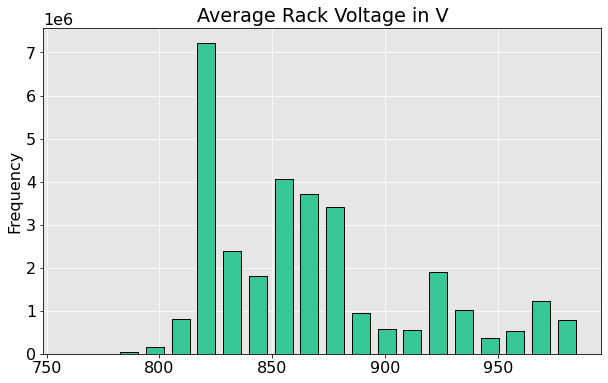

In [23]:
stats[stats['volt']>750]['volt'].dropna().plot(kind='hist',bins=20,edgecolor='black',title='Average Rack Voltage in V',rwidth=0.7)
plt.savefig(f'{path}/volt_hist.svg')

### Current

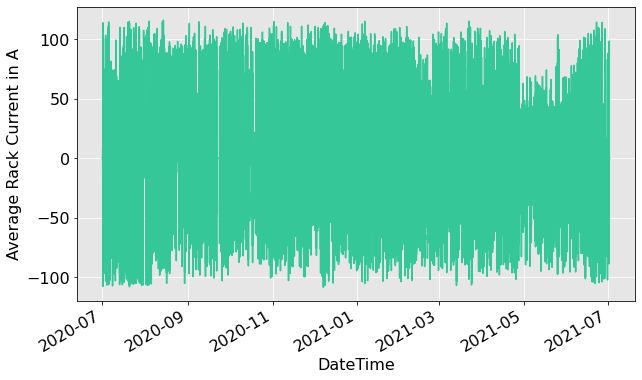

In [6]:
stats['curr'].dropna().plot(ylabel='Average Rack Current in A')
plt.savefig(f'{path}/curr_line.svg')

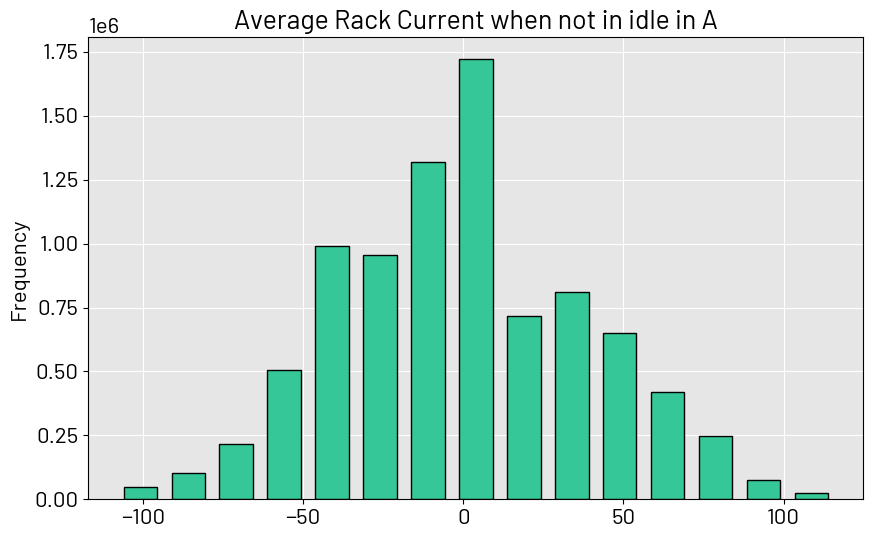

In [27]:
stats.loc[stats['status']!='idle','curr'].plot(kind='hist',bins=15,edgecolor='black',rwidth=0.7)
plt.title('Average Rack Current when not in idle in A')
plt.savefig(f'{path}/curr_hist.svg')

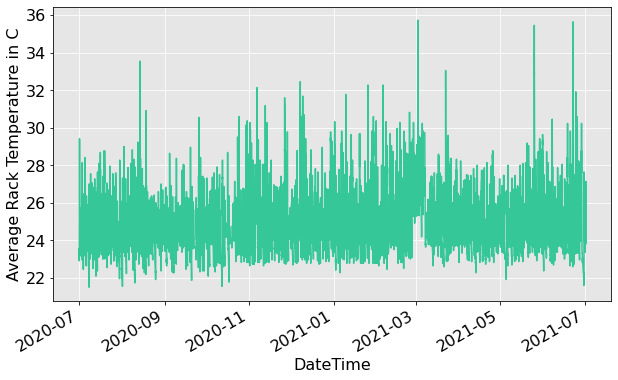

In [8]:
stats[stats['temp']>5]['temp'].dropna().plot(ylabel='Average Rack Temperature in C')
plt.savefig(f'{path}/temp_line.svg')

In [43]:
stats[stats['temp']<10]['temp']

DateTime
2020-07-16 22:20:00    0.000000
2020-07-16 22:25:00    0.000000
2020-07-16 22:30:00    0.000000
2020-10-27 10:00:00    0.000000
2020-12-03 15:15:00    0.000000
2021-02-09 19:10:00    2.227273
2021-04-12 16:55:00    0.000000
Name: temp, dtype: float64

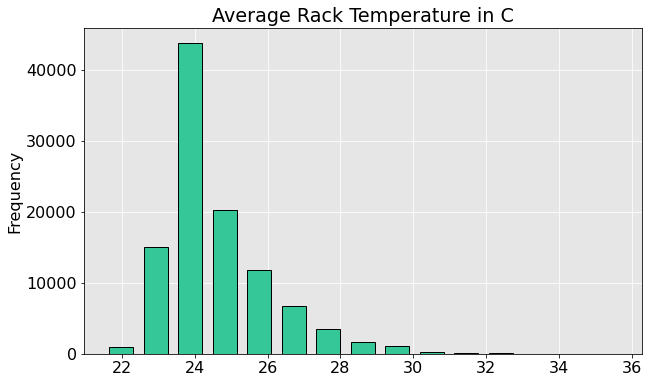

In [27]:
stats[stats['temp']>5]['temp'].dropna().plot(kind='hist',bins=14,edgecolor='black',title='Average Rack Temperature in C',rwidth=0.7)
plt.savefig(f'{path}/temp_hist.svg')

### Investigation

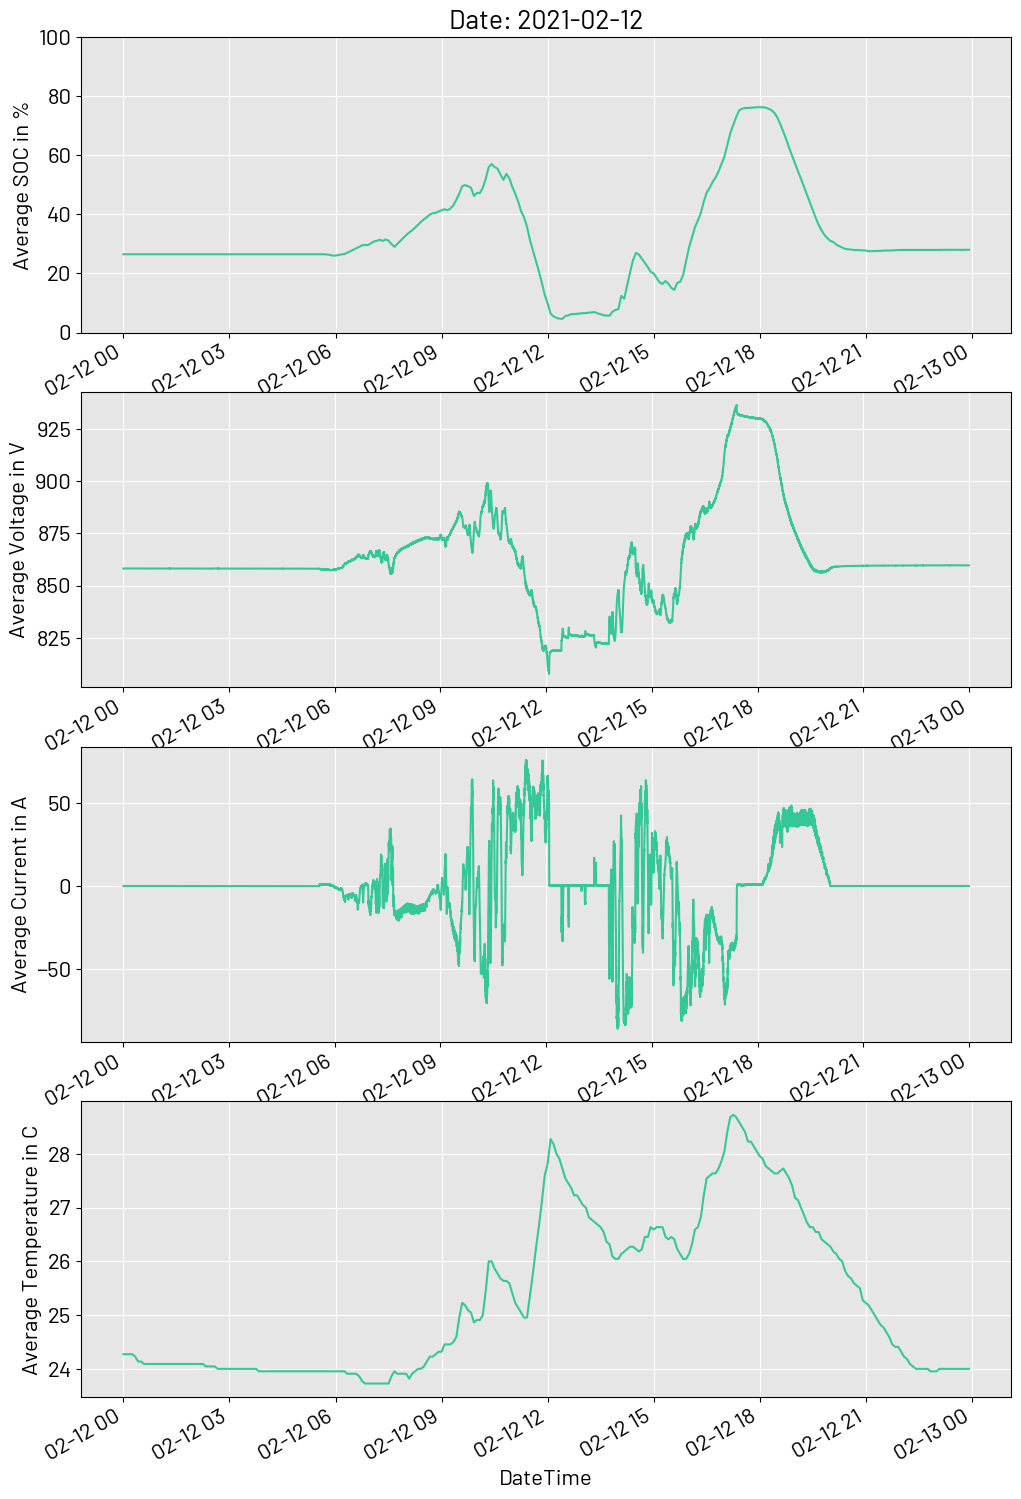

In [53]:
date1 = '2021-02-12'
date2 = '2021-02-13'
plt.figure(figsize=(12,20))
plt.subplot(4,1,1)
plt.title(f'Date: {date1}')
stats.loc[(stats.index>=date1)&(stats.index<date2),'soc'].dropna().plot(ylabel='Average SOC in %')
plt.ylim(0,100)
plt.subplot(4,1,2)
stats.loc[(stats.index>=date1)&(stats.index<date2),'volt'].dropna().plot(ylabel='Average Voltage in V')
plt.subplot(4,1,3)
stats.loc[(stats.index>=date1)&(stats.index<date2),'curr'].dropna().plot(ylabel='Average Current in A')
plt.subplot(4,1,4)
stats.loc[(stats.index>=date1)&(stats.index<date2),'temp'].dropna().plot(ylabel='Average Temperature in C')
plt.savefig(f'{path}/snip.svg')

## Charge status

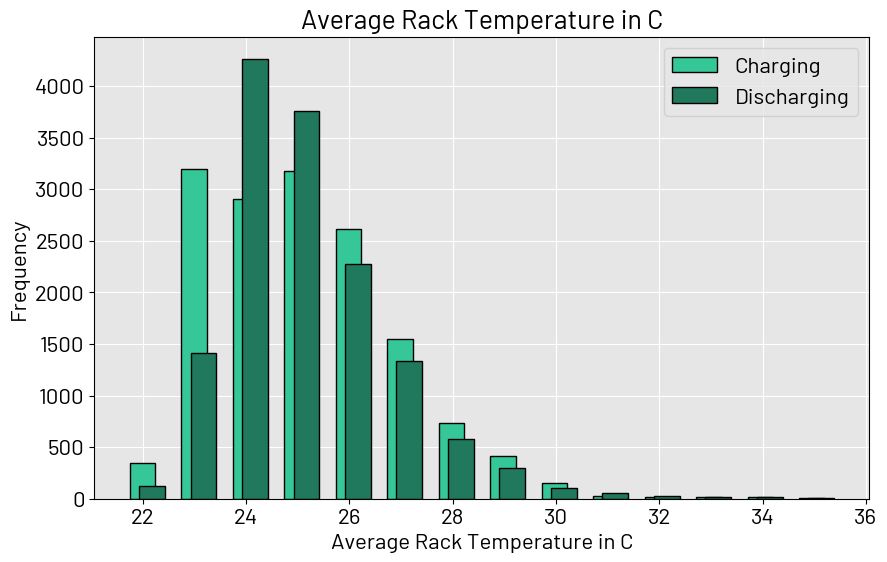

In [29]:
stats[stats['status']=='charge']['temp'].plot.hist(title='Average Rack Temperature in C',edgecolor='black',rwidth=0.5,bins=14)
stats[stats['status']=='discharge']['temp'].plot.hist(edgecolor='black',rwidth=0.5,bins=14)
plt.xlabel('Average Rack Temperature in C')
plt.legend(['Charging','Discharging'])
plt.savefig(f'{path}/charge_temp_hist.svg')

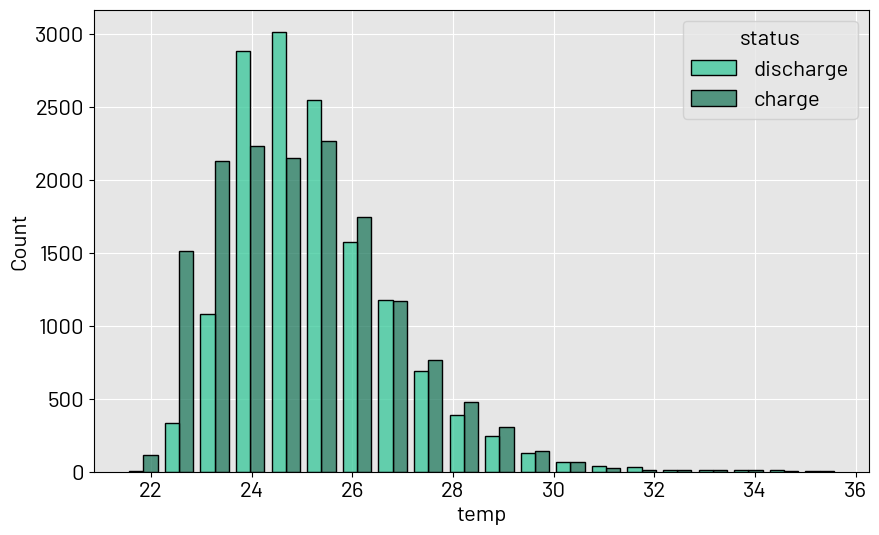

In [24]:
data = stats.loc[(stats['status']=='charge')|(stats['status']=='discharge'),['status','temp']].reset_index()
sns.histplot(data=data,x='temp',hue='status',multiple='dodge',bins=20,shrink=0.8)
plt.savefig(f'{path}/charge_temp_hist.svg')

<AxesSubplot:xlabel='status', ylabel='Count'>

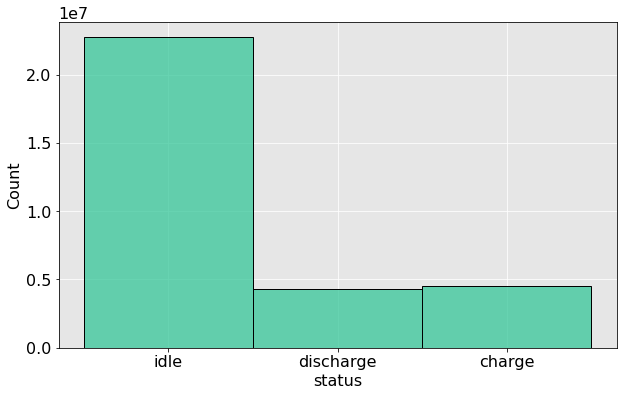

In [30]:
sns.histplot(stats['status'].dropna())

In [ ]:
stats.plot.pie(y='status')

In [5]:
t_idle = stats.loc[stats['status']=='idle','status'].count() / 60 / 60
t_charge = stats.loc[stats['status']=='charge','status'].count() / 60 / 60
t_discharge = stats.loc[stats['status']=='discharge','status'].count() / 60 / 60
print('Time spent idle = ',t_idle,' hours')
print('Time spent charging = ',t_charge,' hours')
print('Time spent discharging = ',t_discharge,' hours')

Time spent idle =  6314.671666666666  hours
Time spent charging =  1252.4983333333332  hours
Time spent discharging =  1190.821388888889  hours


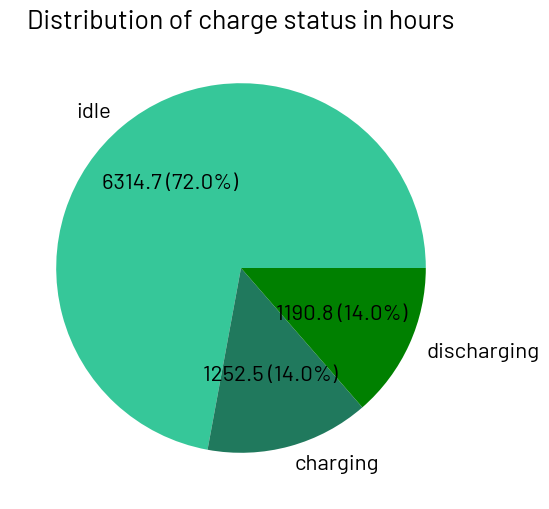

In [6]:
def vals(val):
    return f'{np.round(val/100.*data.sum(),1)} ({np.round(val)}%)'
data = np.array([t_idle,t_charge,t_discharge])
plt.pie(data,labels=['idle','charging','discharging'],autopct=vals,colors=["#36c799","#20795D","green"])
plt.title('Distribution of charge status in hours')
plt.savefig(f'{path}/charge_pie.svg')

## C-Rates

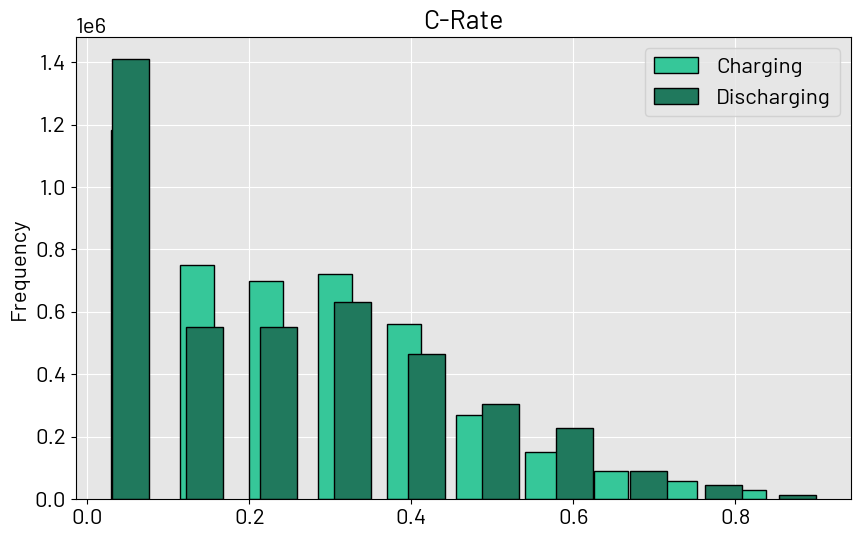

In [4]:
cap = 126
stats['c-rate'] = np.abs(stats['curr'])/cap
stats.loc[stats['status']=='charge','c-rate'].plot.hist(sharex=True,edgecolor='black',rwidth=0.5,bins=15)
stats.loc[stats['status']=='discharge','c-rate'].plot.hist(sharex=True,edgecolor='black',rwidth=0.5,bins=15)
plt.title('C-Rate')
plt.legend(['Charging','Discharging'])
plt.savefig(f'{path}/crate_hist.svg')

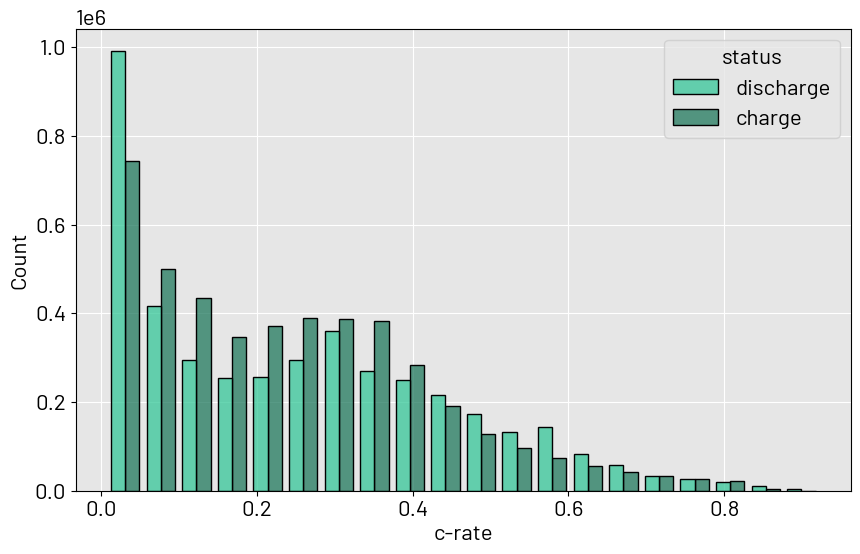

In [23]:
cr = stats.loc[(stats['status']=='charge')|(stats['status']=='discharge'),['status','c-rate']].reset_index()
sns.histplot(data=cr,x='c-rate',hue='status',multiple='dodge',bins=20,shrink=0.8)
plt.savefig(f'{path}/crate_hist.svg')

## DOD, Cycles

In [39]:
soc = stats['soc'].dropna()
stats['local_max'] = stats[(stats['soc'].shift(1) < stats['soc']) & (stats['soc'].shift(-1) < stats['soc'])]['soc']
stats['local_min'] = stats[(stats['soc'].shift(1) > stats['soc']) & (stats['soc'].shift(-1) > stats['soc'])]['soc']
cycles = stats['local_max'].dropna()
dod = stats['local_max'].dropna()-stats['local_min'].dropna()
print('Number of cycles = ',cycles.count())
print('Depth of Discharge')
display(stats['local_max'].dropna())
display(stats['local_min'].dropna())

Number of cycles =  3608
Depth of Discharge


DateTime
2020-07-01 07:40:00    14.136364
2020-07-01 08:25:00    15.954545
2020-07-01 10:10:00    31.181818
2020-07-01 10:55:00    28.500000
2020-07-01 11:05:00    27.363636
                         ...    
2021-07-01 15:55:00    57.272727
2021-07-01 19:15:00     6.363636
2021-07-01 14:35:00    96.500000
2021-07-01 15:55:00    57.272727
2021-07-01 19:15:00     6.363636
Name: local_max, Length: 3608, dtype: float64

DateTime
2020-07-01 08:05:00     9.909091
2020-07-01 09:35:00     9.545455
2020-07-01 10:30:00    14.409091
2020-07-01 11:00:00    27.136364
2020-07-01 11:10:00    26.863636
                         ...    
2021-07-01 06:45:00    25.772727
2021-07-01 12:45:00    92.500000
2021-07-01 14:00:00    90.500000
2021-07-01 15:50:00    57.136364
2021-07-01 19:10:00     6.318182
Name: local_min, Length: 3768, dtype: float64

In [66]:
from scipy.signal import argrelextrema
n = 3
min = stats.iloc[argrelextrema(stats['soc'].values, np.less,order=n)[0]]['soc']
max = stats.iloc[argrelextrema(stats['soc'].values, np.greater,order=n)[0]]['soc']
display(min,max)

DateTime
2020-07-01 08:05:00     9.909091
2020-07-01 09:35:00     9.545455
2020-07-01 10:30:00    14.409091
2020-07-01 11:10:00    26.863636
2020-07-02 06:40:00    44.545455
                         ...    
2021-06-30 23:45:00    27.409091
2021-07-01 04:45:00    27.181818
2021-07-01 06:45:00    25.772727
2021-07-01 12:45:00    92.500000
2021-07-01 14:00:00    90.500000
Name: soc, Length: 1120, dtype: float64

DateTime
2020-07-01 07:40:00    14.136364
2020-07-01 08:25:00    15.954545
2020-07-01 10:10:00    31.181818
2020-07-01 10:55:00    28.500000
2020-07-01 12:55:00    87.409091
                         ...    
2021-06-29 07:10:00     4.500000
2021-06-29 08:05:00     6.909091
2021-06-30 08:45:00    17.227273
2021-06-30 13:00:00    96.000000
2021-07-01 14:35:00    96.500000
Name: soc, Length: 1041, dtype: float64

## Cell Voltages, Cell drift (min vs max vs median), cell drift over time (growth)